Fichier trouve : data/animes.csv

TOP 5 RECOMMANDATIONS :


,Anime,Score_Final,Categorie
21,Steins;Gate,8.98,Chef-d'oeuvre
43,Your Lie in April,8.96,Chef-d'oeuvre
35,Frieren: Beyond Journey's End,8.91,Chef-d'oeuvre
13,Les Carnets de l'apothicaire,8.89,Chef-d'oeuvre
67,Oshi no Ko,8.88,Chef-d'oeuvre


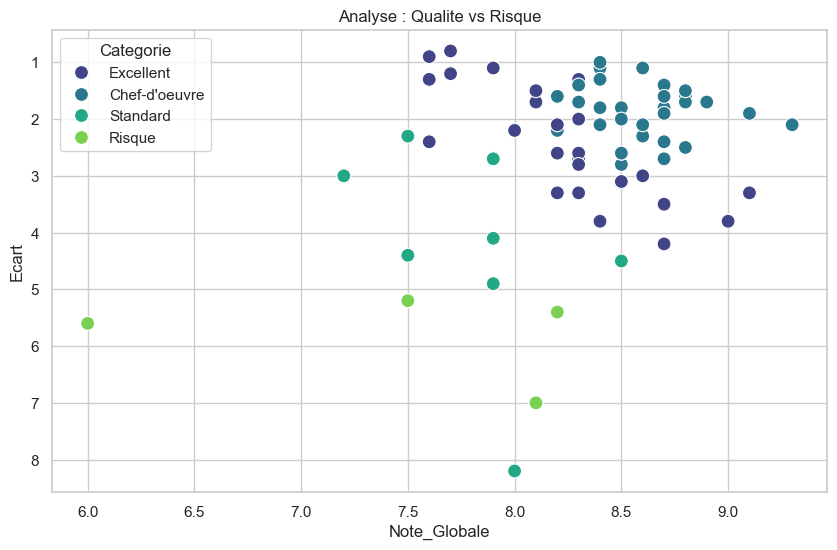

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemins_possibles = [
    'data/animes.csv',
    '../data/animes.csv',
    'animes.csv'
]

fichier_trouve = None
for chemin in chemins_possibles:
    if os.path.exists(chemin):
        fichier_trouve = chemin
        break

if fichier_trouve:
    print(f"Fichier trouve : {fichier_trouve}")
    df = pd.read_csv(fichier_trouve)
else:
    print("Erreur : Fichier animes.csv introuvable")
    raise FileNotFoundError("Fichier introuvable")

df_clean = df.copy()
df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].fillna(0)
df_clean['Nb_Episodes'] = pd.to_numeric(df_clean['Nb_Episodes'], errors='coerce').fillna(12)

df_clean['Ecart'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']
df_clean['Regularite'] = (10 - df_clean['Ecart']).clip(0, 10)

df_clean['Score_Final'] = (
    0.40 * df_clean['Note_Globale'] + 
    0.30 * df_clean['Regularite'] + 
    0.30 * df_clean['Note_Meilleur_Ep']
)

def donner_categorie(row):
    if row['Score_Final'] >= 8.5 and row['Regularite'] >= 7: return "Chef-d'oeuvre"
    elif row['Score_Final'] >= 8.0: return "Excellent"
    elif row['Note_Meilleur_Ep'] >= 9.0 and row['Regularite'] < 5: return "Risque"
    elif row['Score_Final'] < 6.0: return "A Eviter"
    else: return "Standard"

df_clean['Categorie'] = df_clean.apply(donner_categorie, axis=1)

print("\nTOP 5 RECOMMANDATIONS :")
display(df_clean.sort_values('Score_Final', ascending=False).head(5)[['Anime', 'Score_Final', 'Categorie']])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', palette='viridis', s=100)
plt.title("Analyse : Qualite vs Risque")
plt.gca().invert_yaxis()
plt.show()

✅ Fichier trouvé : data/animes.csv

🎉 SUCCÈS TOTAL !
Le fichier 'resultat_projet.csv' vient d'être créé dans ton dossier.


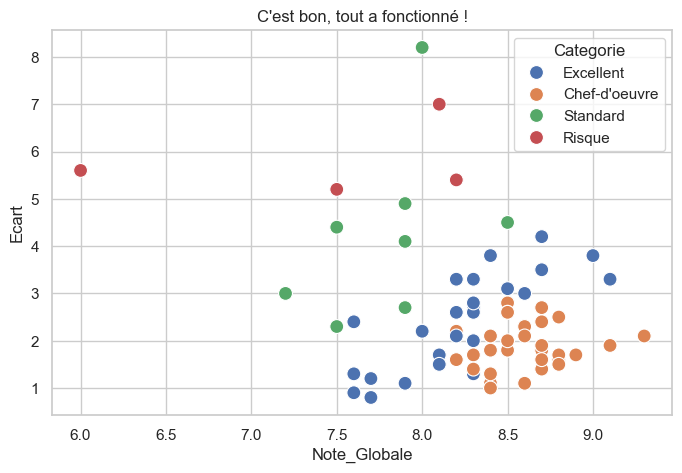

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. ON CHERCHE LE FICHIER ---
chemins = ['data/animes.csv', '../data/animes.csv', 'animes.csv']
fichier = None
for c in chemins:
    if os.path.exists(c):
        fichier = c
        break

if fichier:
    print(f"✅ Fichier trouvé : {fichier}")
    df = pd.read_csv(fichier)
else:
    raise FileNotFoundError("❌ ERREUR : Fichier animes.csv introuvable !")

# --- 2. ON FAIT LES CALCULS (C'est ça le fameux df_clean) ---
df_clean = df.copy()
df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].fillna(0)
df_clean['Nb_Episodes'] = pd.to_numeric(df_clean['Nb_Episodes'], errors='coerce').fillna(12)

df_clean['Ecart'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']
df_clean['Regularite'] = (10 - df_clean['Ecart']).clip(0, 10)

df_clean['Score_Final'] = (
    0.40 * df_clean['Note_Globale'] + 
    0.30 * df_clean['Regularite'] + 
    0.30 * df_clean['Note_Meilleur_Ep']
)

def segmenter(row):
    if row['Score_Final'] >= 8.5 and row['Regularite'] >= 7: return "Chef-d'oeuvre"
    elif row['Score_Final'] >= 8.0: return "Excellent"
    elif row['Note_Meilleur_Ep'] >= 9.0 and row['Regularite'] < 5: return "Risque"
    elif row['Score_Final'] < 6.0: return "A Eviter"
    else: return "Standard"

df_clean['Categorie'] = df_clean.apply(segmenter, axis=1)

# --- 3. ON CRÉE LE FICHIER FINAL (L'étape qui manquait) ---
df_clean.to_csv('resultat_projet.csv', index=False, encoding='utf-8-sig')
print("\n🎉 SUCCÈS TOTAL !")
print("Le fichier 'resultat_projet.csv' vient d'être créé dans ton dossier.")

# --- 4. PETIT GRAPHIQUE POUR CONFIRMER ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Note_Globale', y='Ecart', hue='Categorie', s=100)
plt.title("C'est bon, tout a fonctionné !")
plt.show()